In [1]:
import pandas as pd
import os
from pathlib import Path
import shutil

In [2]:
name_crypto = 'XRP'
name_folder = Path('crypto_result/'+name_crypto)

In [3]:
if name_folder.exists() and name_folder.is_dir():
    shutil.rmtree(name_folder)
    os.mkdir(name_folder)
else:
    os.mkdir(name_folder)

In [4]:
df=pd.read_csv('dataset/'+name_crypto+'.csv')
df = df[-1258:]

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2018-11-07,40.145882,40.145882,38.239414,38.777153,38.777153,45691584997
362,2018-11-08,38.844688,39.035931,35.718456,35.981739,35.981739,50032470347
363,2018-11-09,35.933544,37.490978,35.933544,36.288418,36.288418,36955014611
364,2018-11-10,36.261742,37.050037,36.224850,36.725471,36.725471,23776193861
365,2018-11-11,36.739750,36.926254,36.098984,36.701366,36.701366,21232055085


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1614,2022-04-13,54.562336,55.170071,53.638634,55.100861,55.100861,127798101996
1615,2022-04-14,55.092346,56.363941,54.203892,55.462879,55.462879,130983587306
1616,2022-04-15,55.461128,60.770081,55.447430,59.971806,59.971806,221137260514
1617,2022-04-16,59.970184,60.846123,58.715740,59.679195,59.679195,116555139925
1618,2022-04-17,59.759186,59.809505,59.039143,59.455135,59.455135,93209706496


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0       38.777153
1       35.981739
2       36.288418
3       36.725471
4       36.701366
          ...    
1253    55.100861
1254    55.462879
1255    59.971806
1256    59.679195
1257    59.455135
Name: Close, Length: 1258, dtype: float64

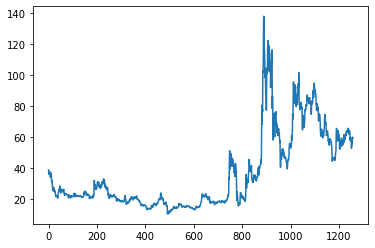

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
df1

0       38.777153
1       35.981739
2       36.288418
3       36.725471
4       36.701366
          ...    
1253    55.100861
1254    55.462879
1255    59.971806
1256    59.679195
1257    59.455135
Name: Close, Length: 1258, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.22244369]
 [0.20053557]
 [0.20293907]
 ...
 [0.38854965]
 [0.38625641]
 [0.38450042]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data

array([[0.22244369],
       [0.20053557],
       [0.20293907],
       [0.20636432],
       [0.20617541],
       [0.21412983],
       [0.20864076],
       [0.18762831],
       [0.18998585],
       [0.18386351],
       [0.19589613],
       [0.20572807],
       [0.1872341 ],
       [0.16188711],
       [0.16825558],
       [0.15511058],
       [0.1442161 ],
       [0.12614502],
       [0.1259185 ],
       [0.11582789],
       [0.11865585],
       [0.13467112],
       [0.12657582],
       [0.11658727],
       [0.12209494],
       [0.11955896],
       [0.11119359],
       [0.11354765],
       [0.1058345 ],
       [0.09048804],
       [0.0874714 ],
       [0.09042029],
       [0.09383303],
       [0.091184  ],
       [0.08937144],
       [0.09157045],
       [0.08673417],
       [0.08141677],
       [0.07977707],
       [0.08083349],
       [0.10283635],
       [0.11199583],
       [0.11354064],
       [0.12628486],
       [0.11564911],
       [0.11773097],
       [0.12262912],
       [0.142

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 319ms/step - loss: 0.0027 - val_loss: 0.0760
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0014 - val_loss: 0.0206
Epoch 3/100
12/12 [==============================] - 2s 204ms/step - loss: 9.7494e-04 - val_loss: 0.0061
Epoch 4/100
12/12 [==============================] - 2s 205ms/step - loss: 9.6618e-04 - val_loss: 0.0083
Epoch 5/100
12/12 [==============================] - 2s 195ms/step - loss: 7.3414e-04 - val_loss: 0.0079
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 6.8810e-04 - val_loss: 0.0069
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 6.0737e-04 - val_loss: 0.0096
Epoch 8/100
12/12 [==============================] - 2s 195ms/step - loss: 5.4251e-04 - val_loss: 0.0117
Epoch 9/100
12/12 [==============================] - 2s 195ms/step - loss: 5.1386e-04 - val_loss: 0.0147
Epoch 10/100
12/12 [==============================] - 2s 195ms/

12/12 [==============================] - 3s 243ms/step - loss: 1.6292e-04 - val_loss: 0.0178
Epoch 79/100
12/12 [==============================] - 3s 240ms/step - loss: 1.7499e-04 - val_loss: 0.0143
Epoch 80/100
12/12 [==============================] - 3s 280ms/step - loss: 1.6275e-04 - val_loss: 0.0099
Epoch 81/100
12/12 [==============================] - 3s 250ms/step - loss: 1.5291e-04 - val_loss: 0.0090
Epoch 82/100
12/12 [==============================] - 3s 214ms/step - loss: 1.6755e-04 - val_loss: 0.0113
Epoch 83/100
12/12 [==============================] - 3s 214ms/step - loss: 1.5160e-04 - val_loss: 0.0124
Epoch 84/100
12/12 [==============================] - 2s 207ms/step - loss: 1.5048e-04 - val_loss: 0.0119
Epoch 85/100
12/12 [==============================] - 2s 208ms/step - loss: 1.5090e-04 - val_loss: 0.0099
Epoch 86/100
12/12 [==============================] - 2s 206ms/step - loss: 1.4905e-04 - val_loss: 0.0152
Epoch 87/100
12/12 [==============================] - 3s 21

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.7.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.135678475619873

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

58.64358759081558

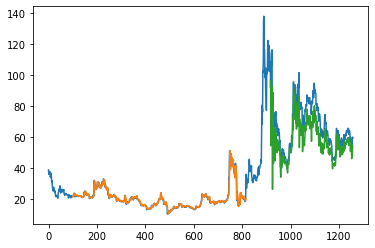

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input = temp_input[:100]

In [36]:
temp_input

[0.35354024186708943,
 0.35762871761137427,
 0.34764571532165295,
 0.3643097583672418,
 0.3809811605092921,
 0.36396690597863185,
 0.3685426103362499,
 0.3726838928877319,
 0.3720094893001794,
 0.3624211430493459,
 0.35868609986430267,
 0.3501754262825201,
 0.33826526550514996,
 0.28933208605399807,
 0.2661795613580381,
 0.28524707433594976,
 0.2766453094036102,
 0.28040471832976005,
 0.28434336318357367,
 0.27736790370909903,
 0.2785749679463934,
 0.2811749704260719,
 0.2733023830165032,
 0.28031428530093133,
 0.2871423825914155,
 0.2712484662475237,
 0.2740353537263745,
 0.30223935346034986,
 0.3088202666162246,
 0.3184629949441048,
 0.4029068007816411,
 0.43263725267420877,
 0.4289819918128916,
 0.40991409481397184,
 0.3692234403978157,
 0.40608696495861596,
 0.39772870853123676,
 0.39438494356764264,
 0.4206924986574548,
 0.41145860379710886,
 0.36993913799948536,
 0.37853318332584546,
 0.39997808415618197,
 0.3740931794530328,
 0.33114408965100534,
 0.3412970956898689,
 0.32736563

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100 
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.331734]
101
1 day input [0.35762872 0.34764572 0.36430976 0.38098116 0.36396691 0.36854261
 0.37268389 0.37200949 0.36242114 0.3586861  0.35017543 0.33826527
 0.28933209 0.26617956 0.28524707 0.27664531 0.28040472 0.28434336
 0.2773679  0.27857497 0.28117497 0.27330238 0.28031429 0.28714238
 0.27124847 0.27403535 0.30223935 0.30882027 0.31846299 0.4029068
 0.43263725 0.42898199 0.40991409 0.36922344 0.40608696 0.39772871
 0.39438494 0.4206925  0.4114586  0.36993914 0.37853318 0.39997808
 0.37409318 0.33114409 0.3412971  0.32736564 0.33003006 0.37082595
 0.36039778 0.34330302 0.37996325 0.38480237 0.37377362 0.36589445
 0.34533143 0.37062009 0.35335942 0.35547594 0.35314127 0.37633807
 0.35958807 0.40109693 0.39173155 0.37652544 0.38292165 0.37701866
 0.39134365 0.39105763 0.39367374 0.40623699 0.39852013 0.41978371
 0.41780636 0.42122992 0.42277227 0.41180866 0.41637232 0.43106799
 0.43297699 0.4273469  0.43010281 0.40313724 0.41126206 0.4095893
 0.42058978 0.40781376 0.40202996 0.3

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1258

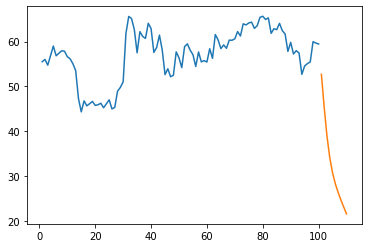

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig("crypto_result/"+ name_crypto +"/fig1.png")

In [42]:
scaler.inverse_transform(lst_output)

array([[52.72228911],
       [45.36174812],
       [38.94262831],
       [34.14818223],
       [30.76378022],
       [28.31936007],
       [26.39786716],
       [24.72235428],
       [23.14964338],
       [21.63383977]])

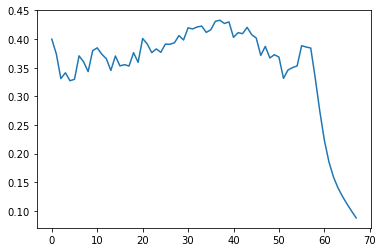

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.savefig("crypto_result/"+ name_crypto +"/fig2.png")

In [44]:
data = scaler.inverse_transform(lst_output).tolist()

In [45]:
data

[[52.722289109337446],
 [45.36174812372285],
 [38.94262830555528],
 [34.148182227601765],
 [30.763780222651153],
 [28.319360066046563],
 [26.397867164857594],
 [24.722354278299765],
 [23.14964338005525],
 [21.6338397746682]]

In [46]:

import numpy as np
np.savez("crypto_result/"+ name_crypto +"/Myfile", data)

In [47]:
a = np.load("crypto_result/"+ name_crypto +"/Myfile.npz") #make sure you use the .npz!
b = a['arr_0']

In [48]:
b

array([[52.72228911],
       [45.36174812],
       [38.94262831],
       [34.14818223],
       [30.76378022],
       [28.31936007],
       [26.39786716],
       [24.72235428],
       [23.14964338],
       [21.63383977]])